In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/Dissertation/Dataset/Analysis/EDAwo_featurename.csv')

In [3]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Assume 'encoded_df' is your encoded DataFrame and 'accident_severity' is the target variable
X = df.drop('accident_severity', axis=1)  # Feature Matrix
y = df['accident_severity']  # Target Variable

# Apply the Chi-Squared test
chi_scores = chi2(X, y)

# The chi_scores result contains two arrays:
# 1) chi-squared values
# 2) p-values
chi2_values = pd.Series(chi_scores[0], index=X.columns)
p_values = pd.Series(chi_scores[1], index=X.columns)

# You can print these to understand which features are the most relevant
print("Chi2 Values:")
print(chi2_values.sort_values(ascending=False))

print("\nP-Values:")
print(p_values.sort_values(ascending=True))

# To select the top 'k' features based on Chi-Squared values
k = 'all'  # you can choose any number that's appropriate for your dataset
top_k_features = SelectKBest(chi2, k=k).fit(X, y)

# Get the indices sorted by most important to least important
indices = np.argsort(top_k_features.scores_)[::-1]

top_k_features = SelectKBest(chi2, k=k).fit(X, y)

# Get the names of the selected feature names directly
selected_features = X.columns[top_k_features.get_support()]

print("\nSelected features are:")
print(selected_features)


Chi2 Values:
speed_limit                                8380.313363
vehicle_manoeuvre                          2597.375498
skidding_and_overturning                   1370.301301
junction_location                           956.004285
junction_detail                             827.014852
number_of_casualties                        786.199356
light_conditions                            745.753578
urban_or_rural_area                         238.321358
road_type                                   161.707744
pedestrian_crossing_physical_facilities     129.051792
first_point_of_impact                       113.081104
first_road_class                             80.960323
number_of_vehicles                           73.319690
journey_purpose_of_driver                    49.937397
sex_of_driver                                47.145986
vehicle_type                                 43.979357
carriageway_hazards                          24.856532
hit_object_off_carriageway                   17.6796

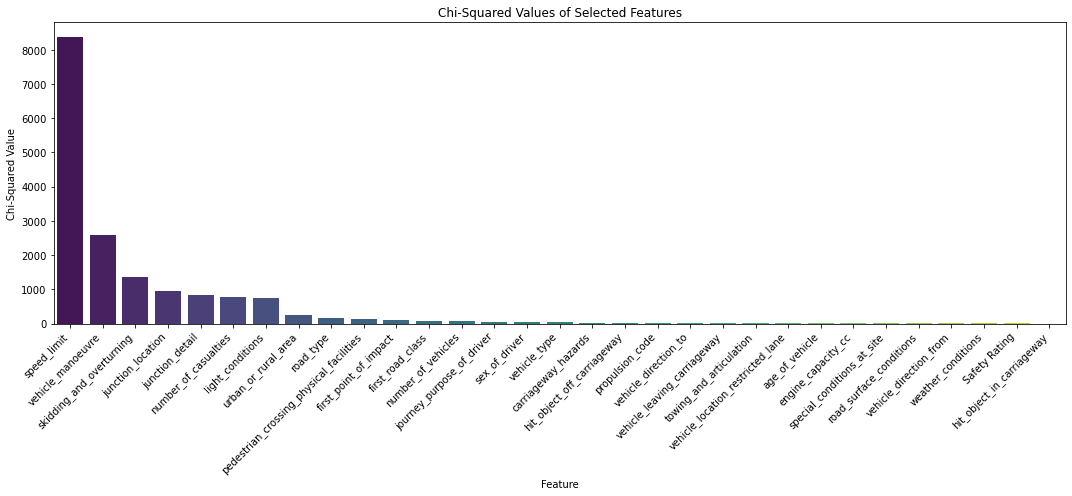

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the Chi2 values for only the selected features
selected_chi2_values = chi2_values[selected_features]

# Sort the series for better visualization
sorted_chi2 = selected_chi2_values.sort_values(ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x=sorted_chi2.index, y=sorted_chi2.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Chi-Squared Values of Selected Features")
plt.ylabel("Chi-Squared Value")
plt.xlabel("Feature")

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming df is your DataFrame
cramers_values = {}
target = 'accident_severity'
for column in df.columns:
    if column != target:
        cramers_values[column] = cramers_v(df[column], df[target])

# Sorting the variables by Cramér's V value
sorted_cramers = sorted(cramers_values.items(), key=lambda x: x[1], reverse=True)

for column, value in sorted_cramers:
    print(f"{column}: {value}")


urban_or_rural_area: 0.10052186990697366
vehicle_manoeuvre: 0.08692830722869836
speed_limit: 0.0866142178713308
number_of_vehicles: 0.08328732744199455
number_of_casualties: 0.08263159354632364
first_point_of_impact: 0.0701890119894669
vehicle_leaving_carriageway: 0.06561104677040612
light_conditions: 0.06333684345202094
junction_detail: 0.06128644603908324
junction_location: 0.057894586565898395
hit_object_off_carriageway: 0.05584493051634354
journey_purpose_of_driver: 0.05380695893134181
skidding_and_overturning: 0.04826753692237248
sex_of_driver: 0.0447359380629788
road_type: 0.04101431790525949
pedestrian_crossing_physical_facilities: 0.033624368174504767
vehicle_type: 0.03264642035793511
first_road_class: 0.027084669348028785
weather_conditions: 0.014981484171174472
engine_capacity_cc: 0.014685515080438935
hit_object_in_carriageway: 0.014572993839235378
vehicle_direction_from: 0.013214929073380207
carriageway_hazards: 0.012987072855602952
propulsion_code: 0.012464841655629588
age_

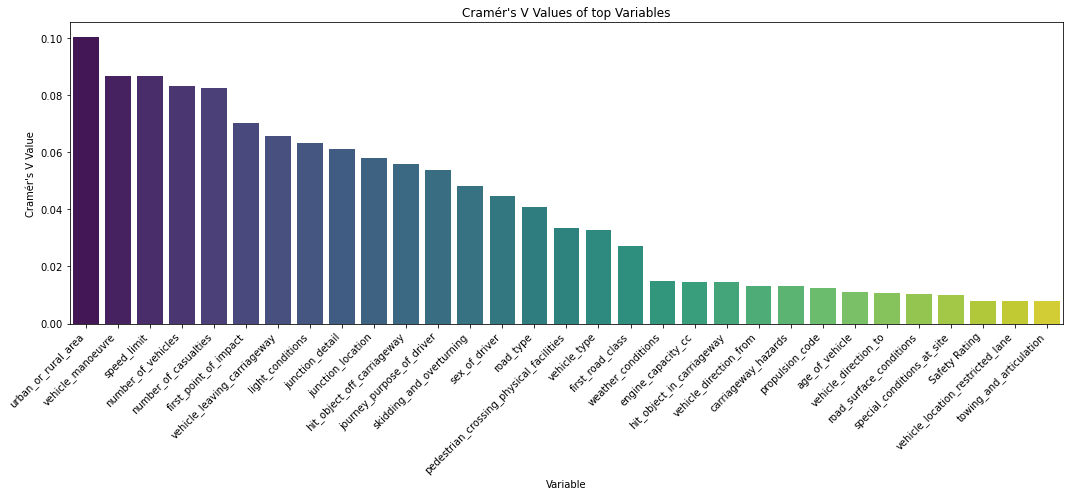

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting column names and their corresponding Cramér's V values
columns = [item[0] for item in sorted_cramers]
values = [item[1] for item in sorted_cramers]

plt.figure(figsize=(15, 7))
sns.barplot(x=columns, y=values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Cramér's V Values of top Variables")
plt.ylabel("Cramér's V Value")
plt.xlabel("Variable")

plt.tight_layout()
plt.show()


In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a threshold for high correlation, e.g., 0.9
# Note: We use 0.9 and -0.9 to capture both positive and negative correlations
threshold_correlation = 0.5

# Identify pairs of features that have correlation higher than the threshold
highly_correlated_pairs = {}
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if (abs(correlation_matrix[column][index]) > threshold_correlation) & (column != index):
            if column not in highly_correlated_pairs:
                highly_correlated_pairs[column] = []
            highly_correlated_pairs[column].append(index)

print("Pairs of highly correlated features:")
for key, values in highly_correlated_pairs.items():
    for value in values:
        print(f"{key} and {value}")


Pairs of highly correlated features:
speed_limit and urban_or_rural_area
urban_or_rural_area and speed_limit
vehicle_leaving_carriageway and hit_object_off_carriageway
hit_object_off_carriageway and vehicle_leaving_carriageway


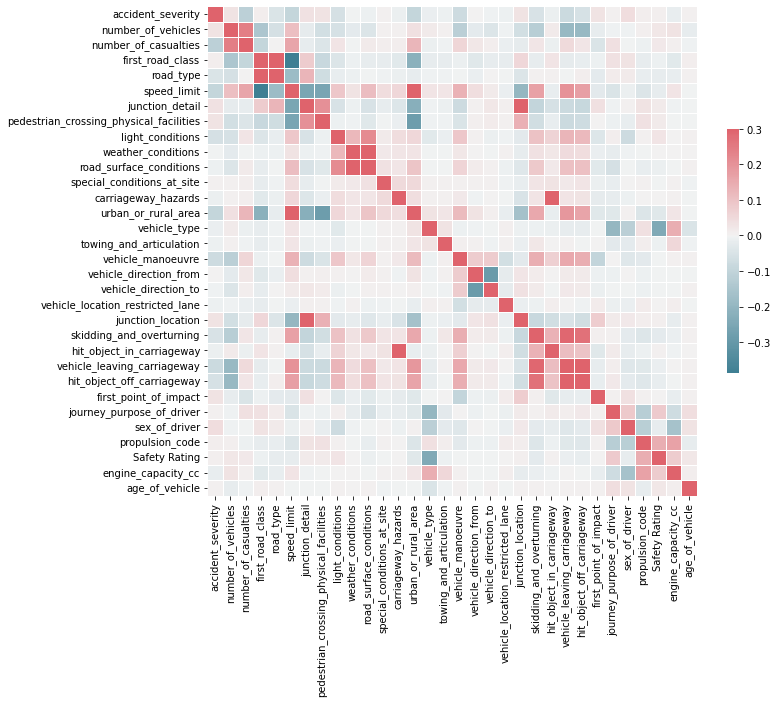

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
df = pd.read_csv('D:/Dissertation/Dataset/Analysis/CleanedData.csv')

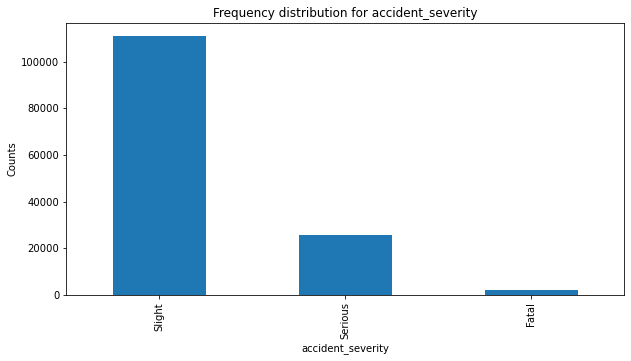

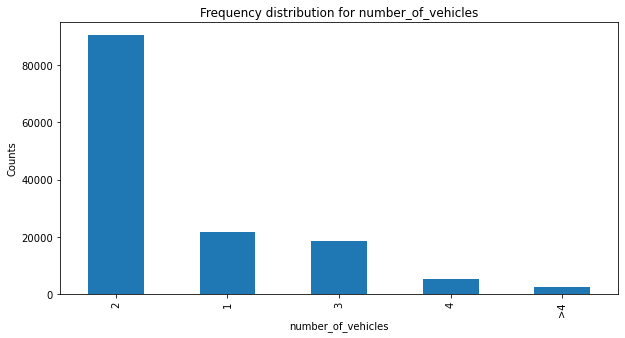

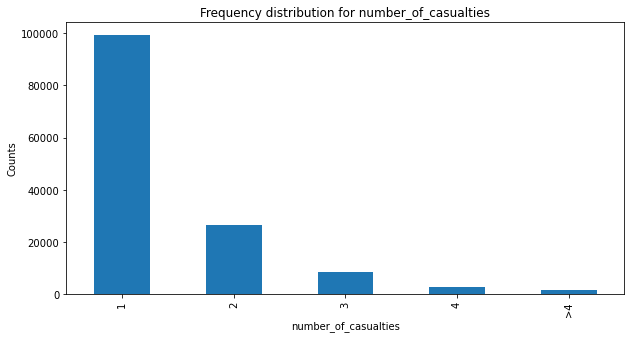

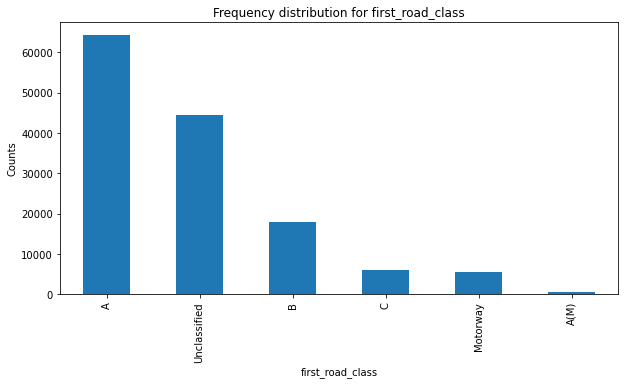

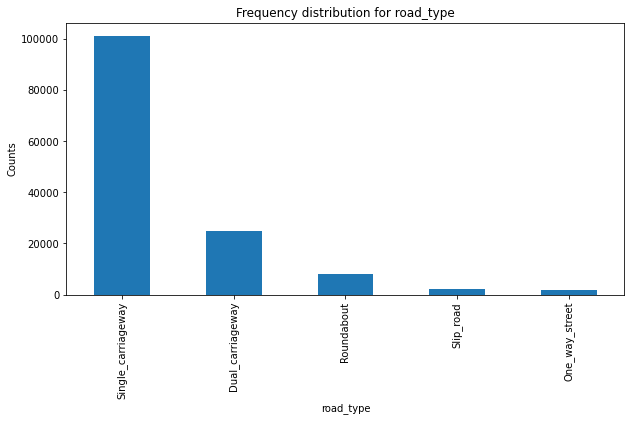

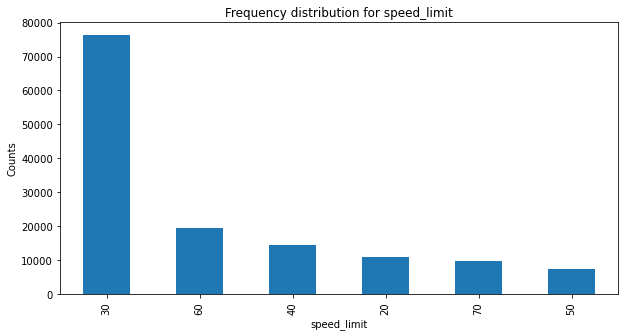

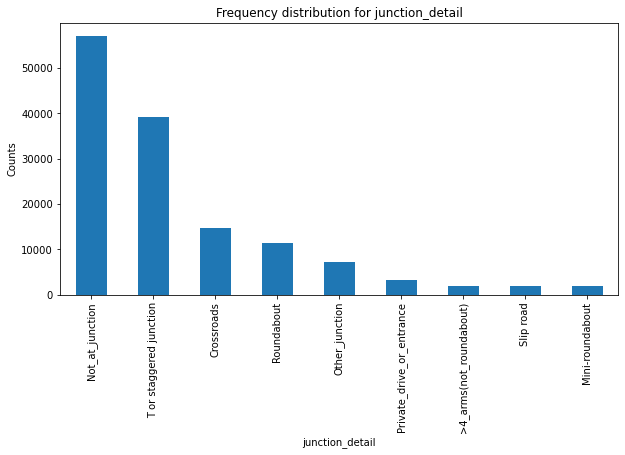

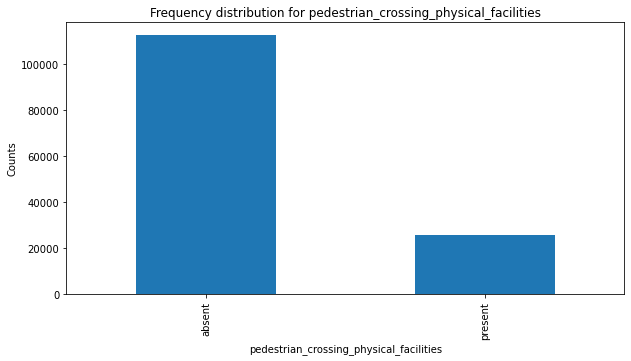

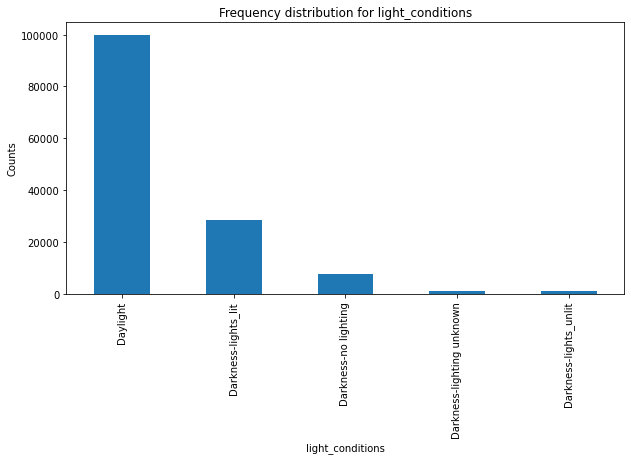

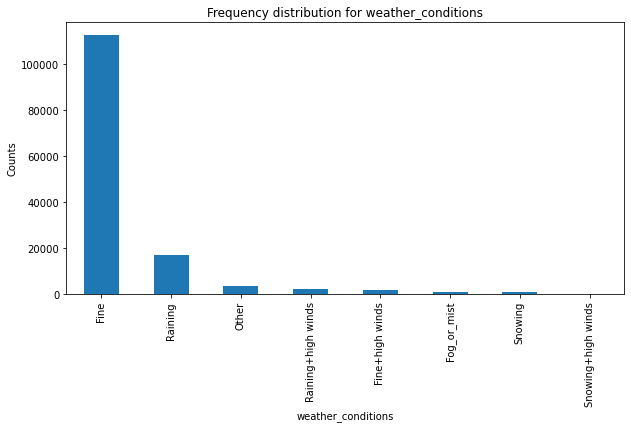

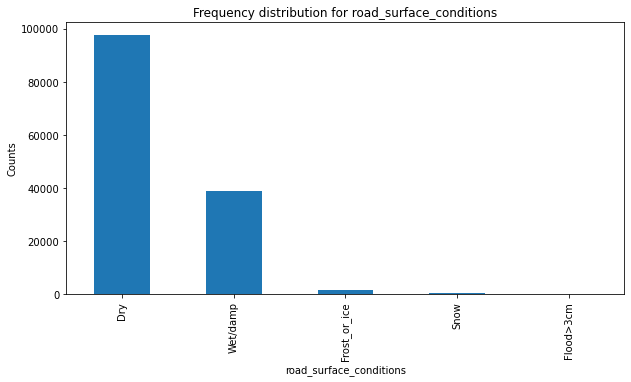

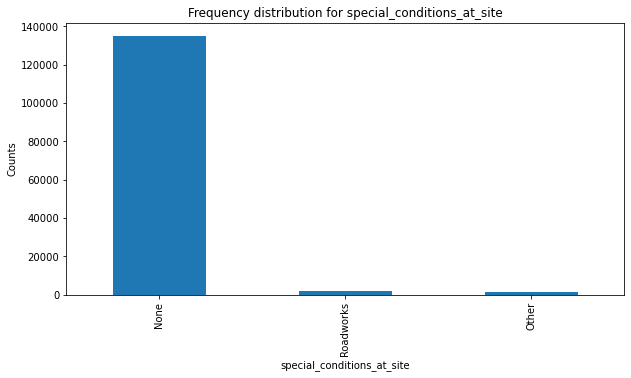

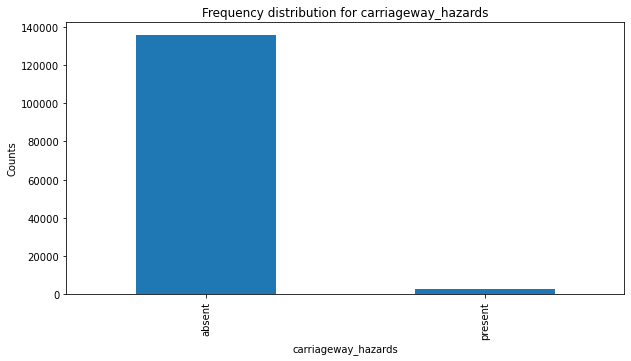

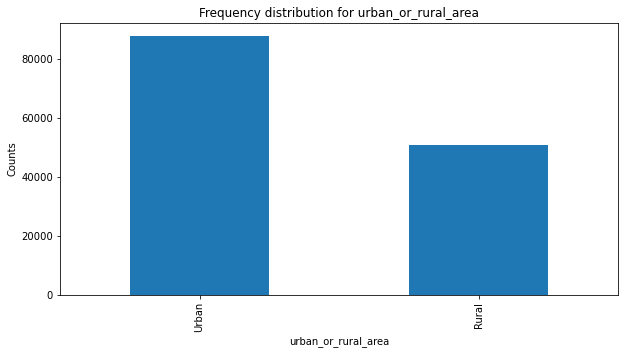

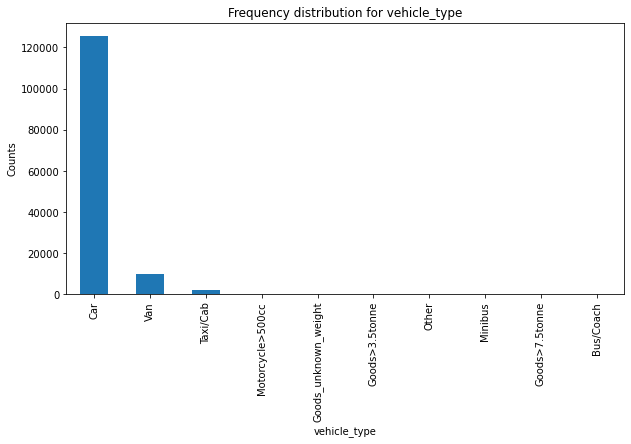

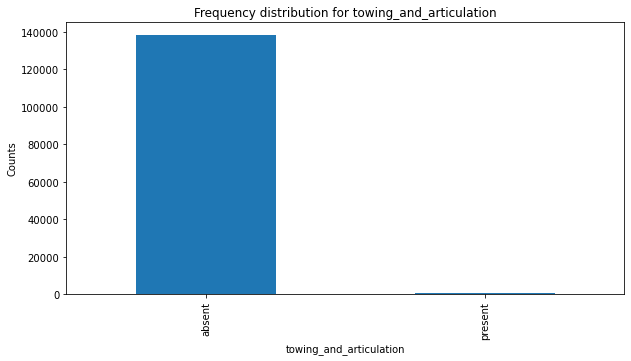

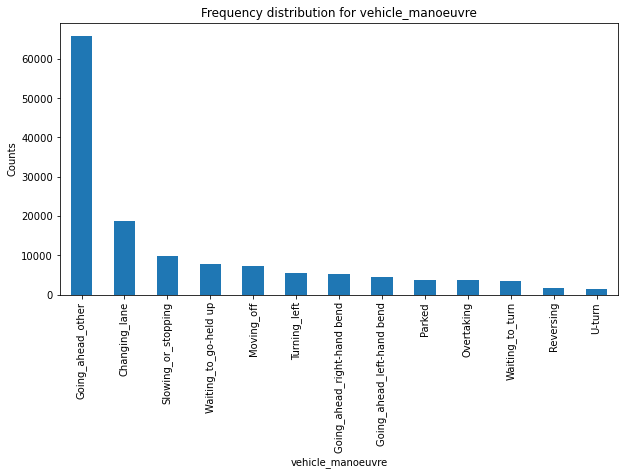

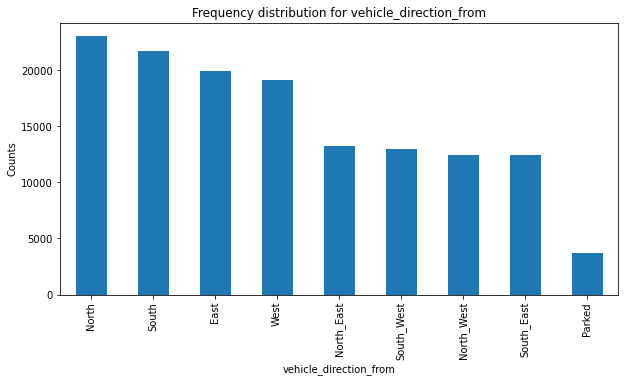

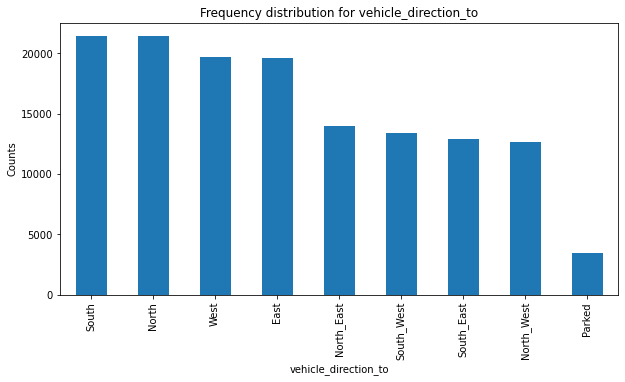

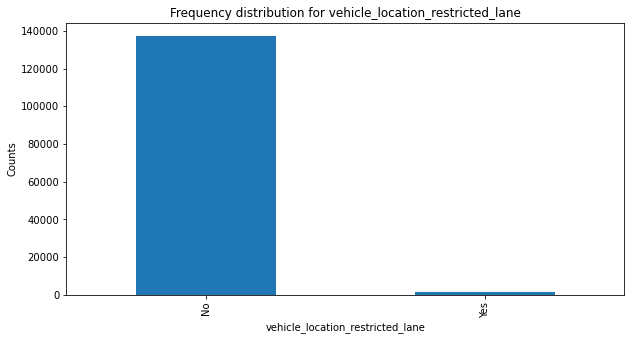

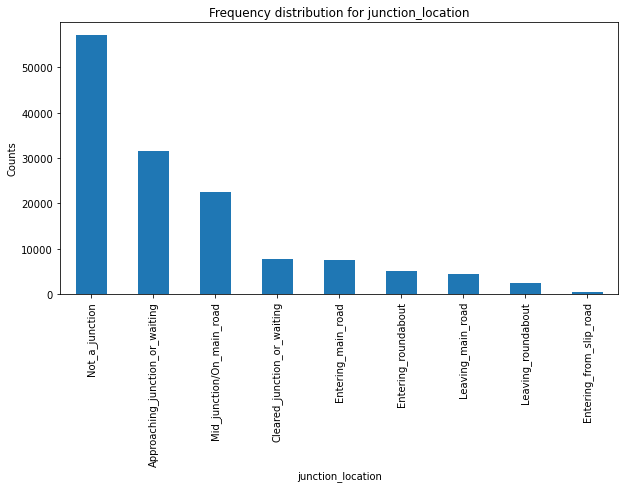

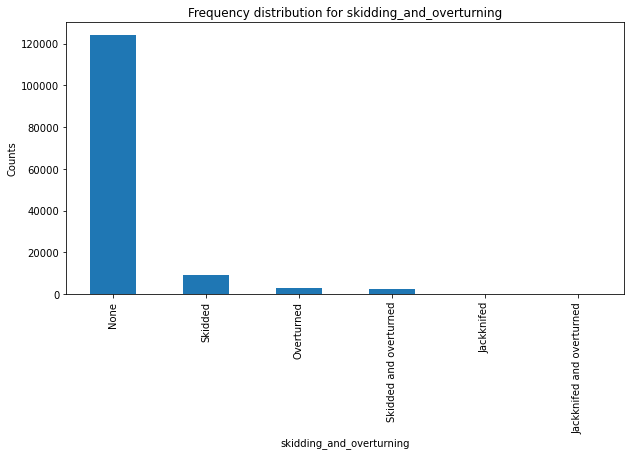

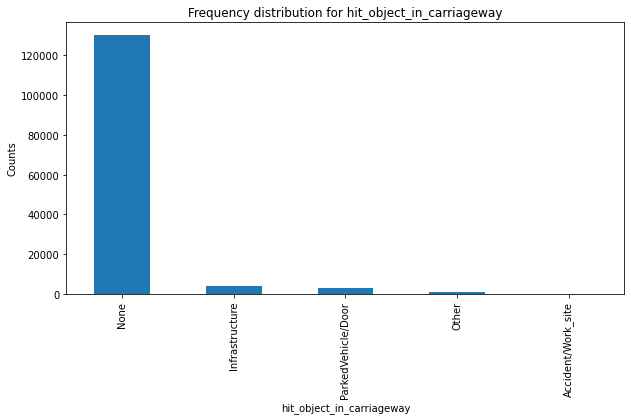

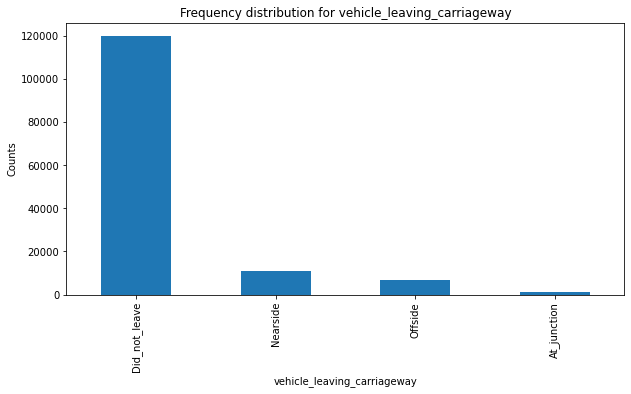

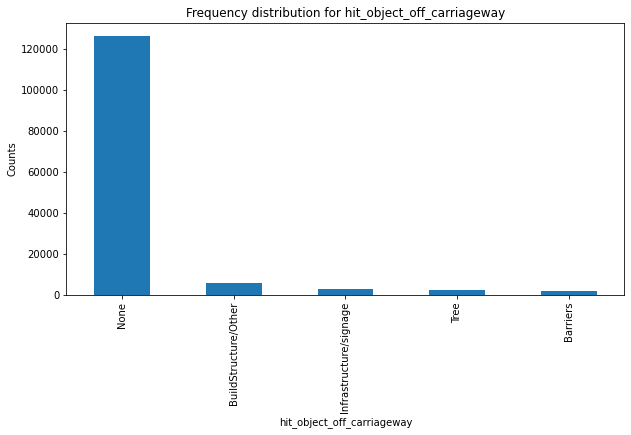

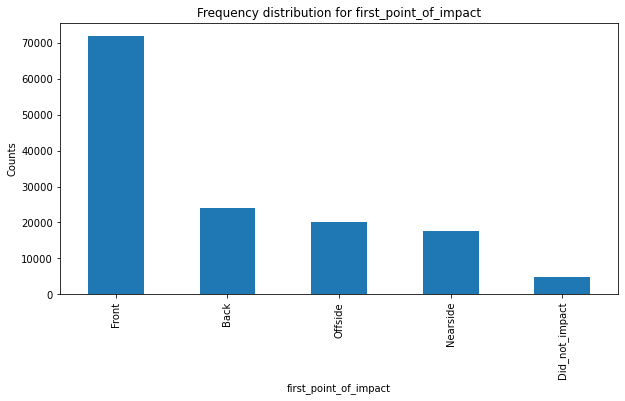

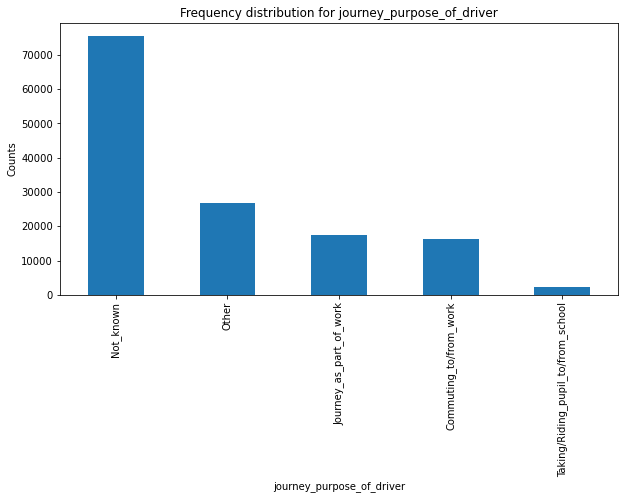

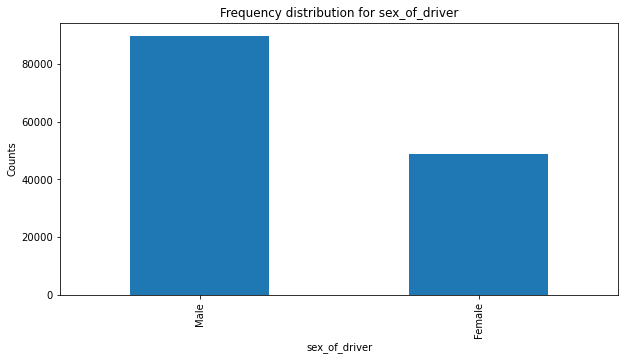

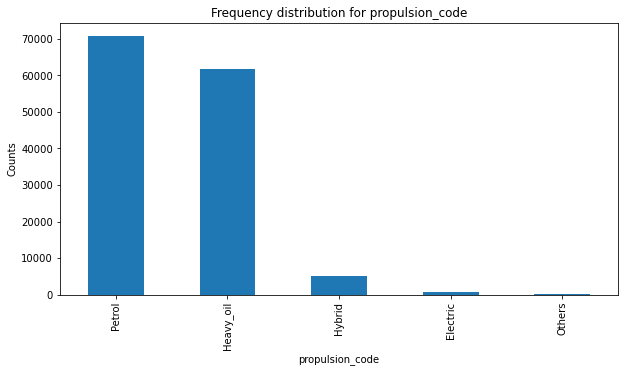

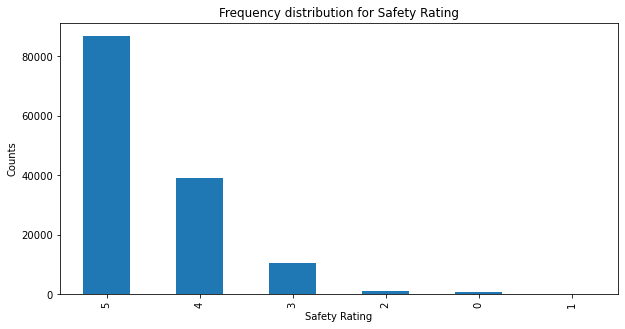

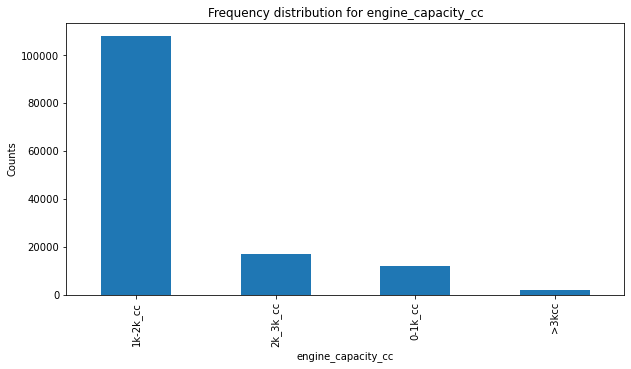

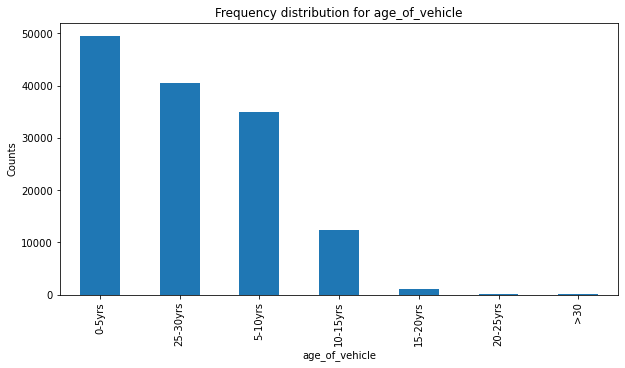

In [10]:
# For visual representation using bar plots
for column in df.columns:
    df[column].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Frequency distribution for {column}")
    plt.ylabel('Counts')
    plt.xlabel(column)
    plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# For displaying frequency distribution as a table
for column in df.columns:
    print(f"Frequency distribution for {column}:\n")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")



Frequency distribution for accident_severity:

Slight     111036
Serious     25525
Fatal        2038
Name: accident_severity, dtype: int64

--------------------------------------------------

Frequency distribution for number_of_vehicles:

2     90283
1     21717
3     18698
4      5302
>4     2599
Name: number_of_vehicles, dtype: int64

--------------------------------------------------

Frequency distribution for number_of_casualties:

1     99099
2     26352
3      8505
4      2913
>4     1730
Name: number_of_casualties, dtype: int64

--------------------------------------------------

Frequency distribution for first_road_class:

A               64173
Unclassified    44547
B               17865
C                6027
Motorway         5443
A(M)              544
Name: first_road_class, dtype: int64

--------------------------------------------------

Frequency distribution for road_type:

Single_carriageway    101207
Dual_carriageway       24968
Roundabout              8248
Slip_road 

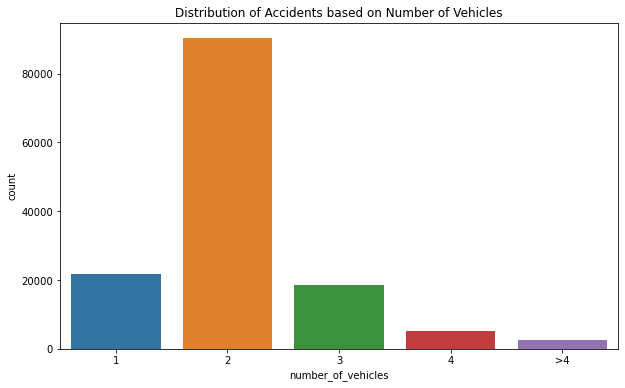

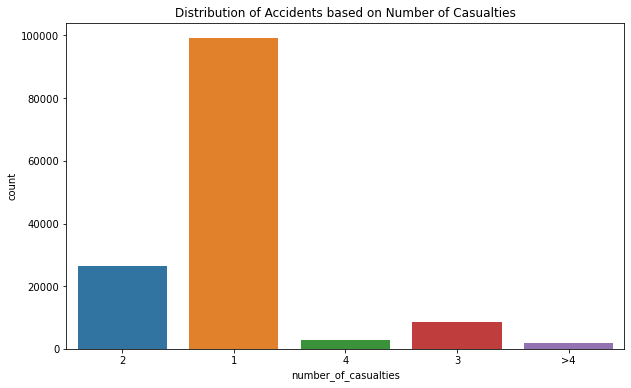

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for number_of_vehicles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='number_of_vehicles')
plt.title('Distribution of Accidents based on Number of Vehicles')
plt.show()

# Bar plot for number_of_casualties
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='number_of_casualties')
plt.title('Distribution of Accidents based on Number of Casualties')
plt.show()


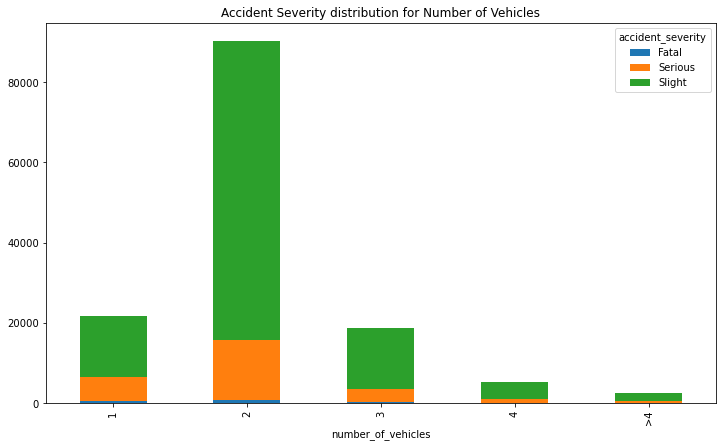

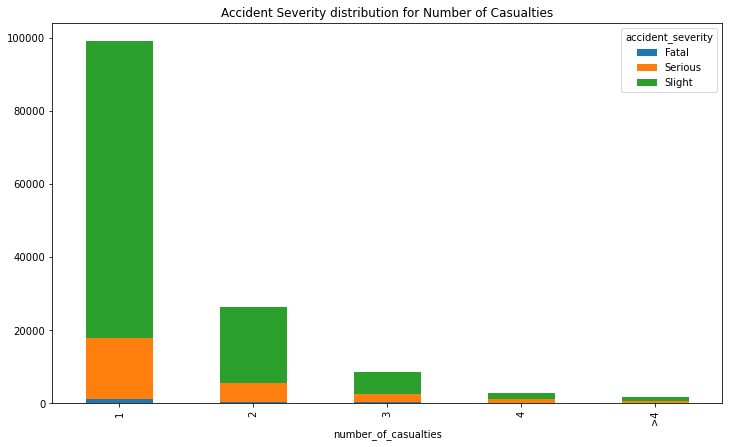

In [13]:
# Stacked bar for accident severity vs number of vehicles
pd.crosstab(df['number_of_vehicles'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Number of Vehicles')
plt.show()

# Stacked bar for accident severity vs number of casualties
pd.crosstab(df['number_of_casualties'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Number of Casualties')
plt.show()


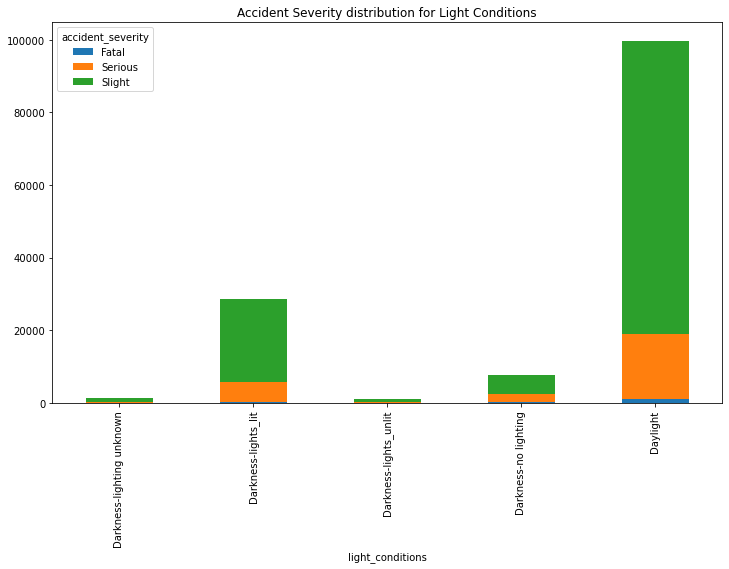

In [14]:
# Stacked bar for accident severity vs light_conditions
pd.crosstab(df['light_conditions'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Light Conditions')
plt.show()


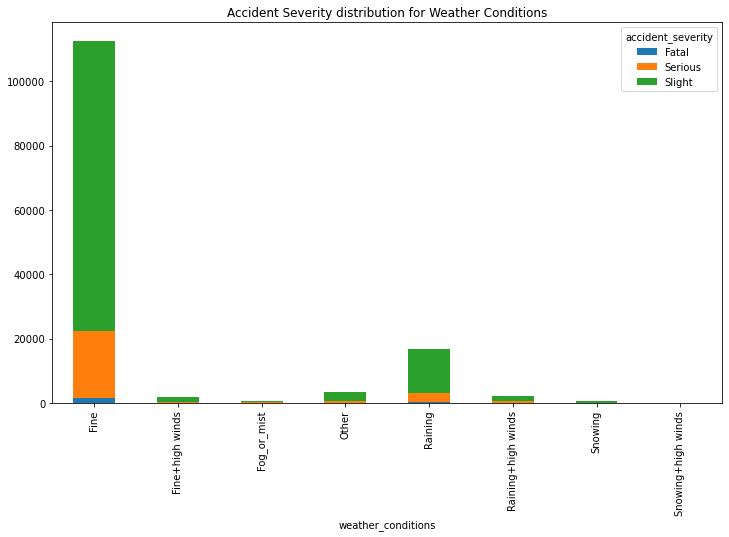

In [15]:
# Stacked bar for accident severity vs weather_conditions
pd.crosstab(df['weather_conditions'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Weather Conditions')
plt.show()


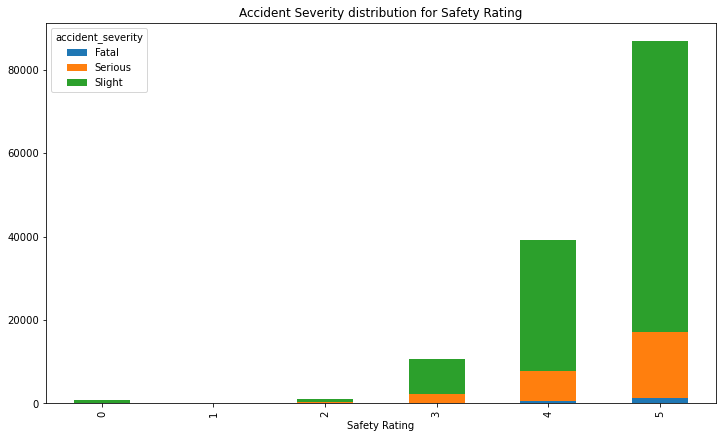

In [16]:
# Stacked bar for accident severity vs Safety Rating
pd.crosstab(df['Safety Rating'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Safety Rating')
plt.show()


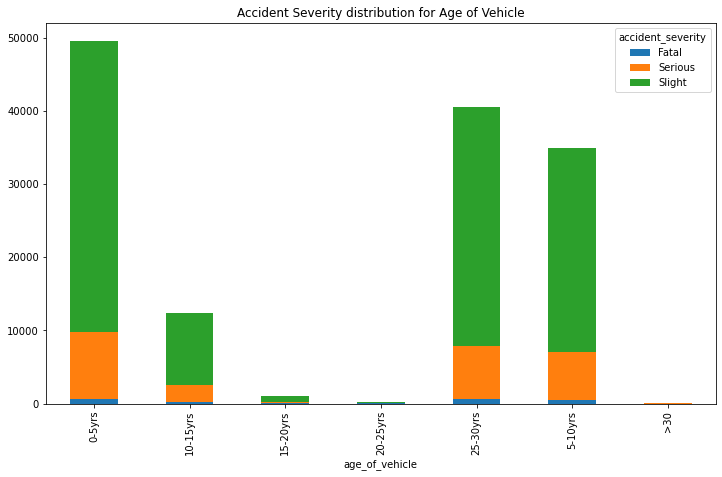

In [17]:
# Stacked bar for accident severity vs age_of_vehicle
pd.crosstab(df['age_of_vehicle'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Age of Vehicle')
plt.show()


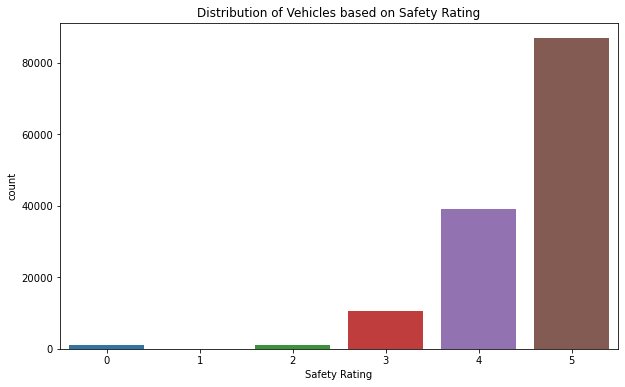

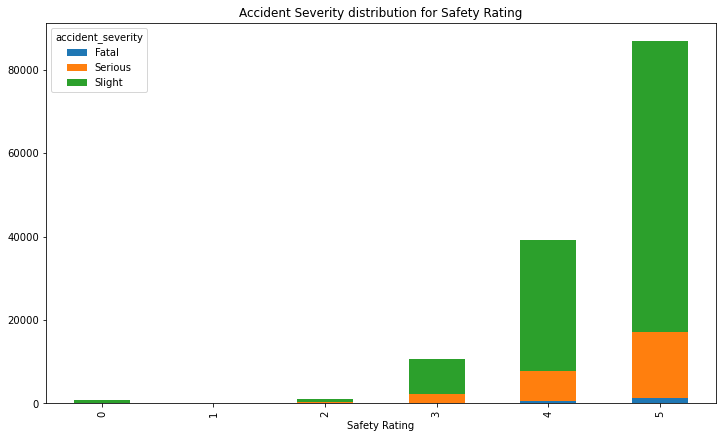

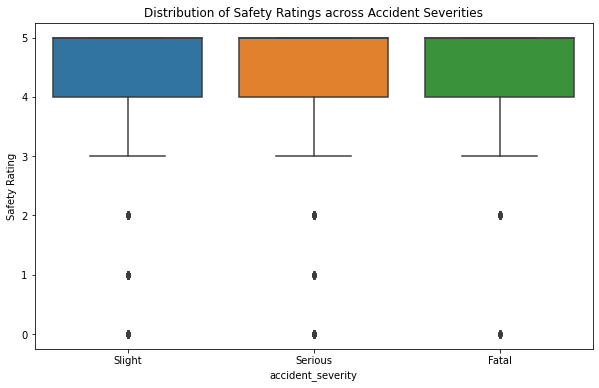

In [18]:
# 5. Safety Rating:
# a) Bar Plots:

# Bar plot for Safety Rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Safety Rating')
plt.title('Distribution of Vehicles based on Safety Rating')
plt.show()

# b) Stacked Bar or Pie Charts:

# Stacked bar for accident severity vs Safety Rating
pd.crosstab(df['Safety Rating'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Safety Rating')
plt.show()

# c) Box Plots:

# Box plot for safety ratings across different accident severities
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='accident_severity', y='Safety Rating')
plt.title('Distribution of Safety Ratings across Accident Severities')
plt.show()


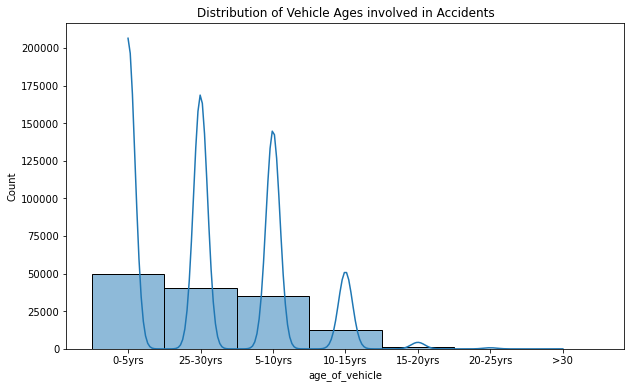

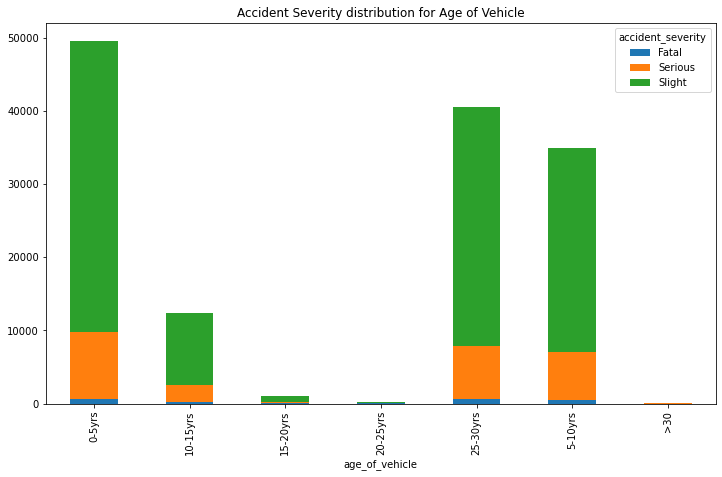

In [19]:
# 6. age_of_vehicle:
# a) Histogram:

# Histogram for age_of_vehicle
plt.figure(figsize=(10, 6))
sns.histplot(df['age_of_vehicle'], bins=20, kde=True)
plt.title('Distribution of Vehicle Ages involved in Accidents')
plt.show()

# b) Stacked Bar or Pie Charts:

# Stacked bar for accident severity vs age_of_vehicle
pd.crosstab(df['age_of_vehicle'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Age of Vehicle')
plt.show()




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [54]:
import pandas as pd 
# data = pd.read_csv('D:/Dissertation/Dataset/Analysis/CleanedData.csv')
# data = pd.read_csv('D:/Dissertation/Dataset/Analysis/datawithoutnull.csv')
data = pd.read_csv('D:/Dissertation/Dataset/Analysis/final.csv')

C:\Users\anura\AppData\Local\Temp\ipykernel_31984\236887972.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:/Dissertation/Dataset/Analysis/final.csv')


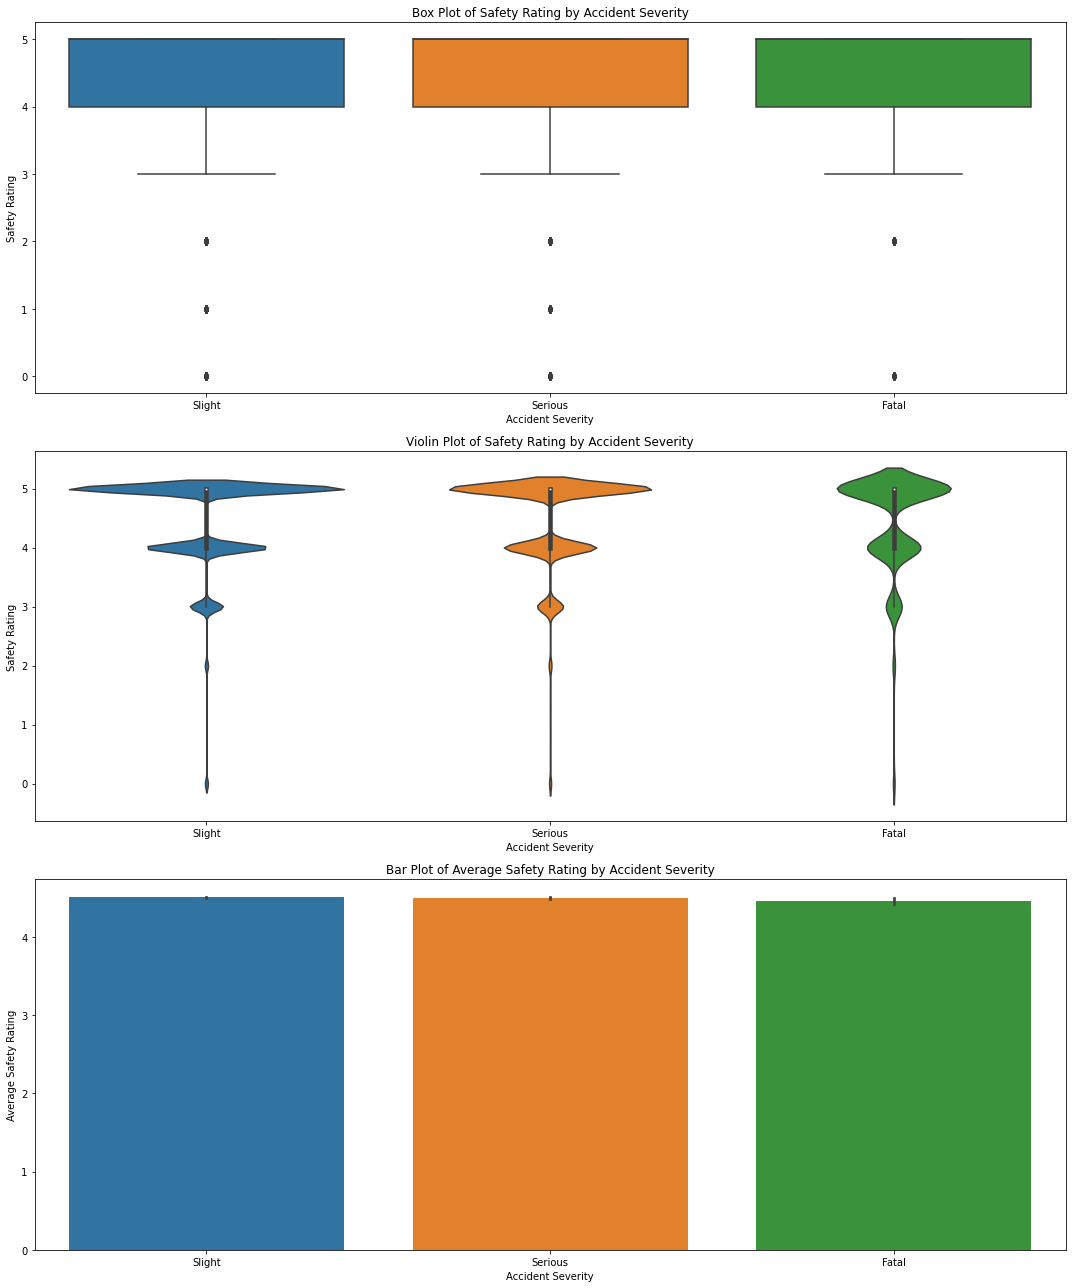

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Box plot
sns.boxplot(x='accident_severity', y='Safety Rating', data=data, ax=axes[0], order=["Slight", "Serious", "Fatal"])
axes[0].set_title('Box Plot of Safety Rating by Accident Severity')
axes[0].set_xlabel('Accident Severity')
axes[0].set_ylabel('Safety Rating')

# Violin plot
sns.violinplot(x='accident_severity', y='Safety Rating', data=data, ax=axes[1], order=["Slight", "Serious", "Fatal"])
axes[1].set_title('Violin Plot of Safety Rating by Accident Severity')
axes[1].set_xlabel('Accident Severity')
axes[1].set_ylabel('Safety Rating')

# Bar plot
sns.barplot(x='accident_severity', y='Safety Rating', data=data, ax=axes[2], order=["Slight", "Serious", "Fatal"])
axes[2].set_title('Bar Plot of Average Safety Rating by Accident Severity')
axes[2].set_xlabel('Accident Severity')
axes[2].set_ylabel('Average Safety Rating')

# Adjust layout
plt.tight_layout()
plt.show()


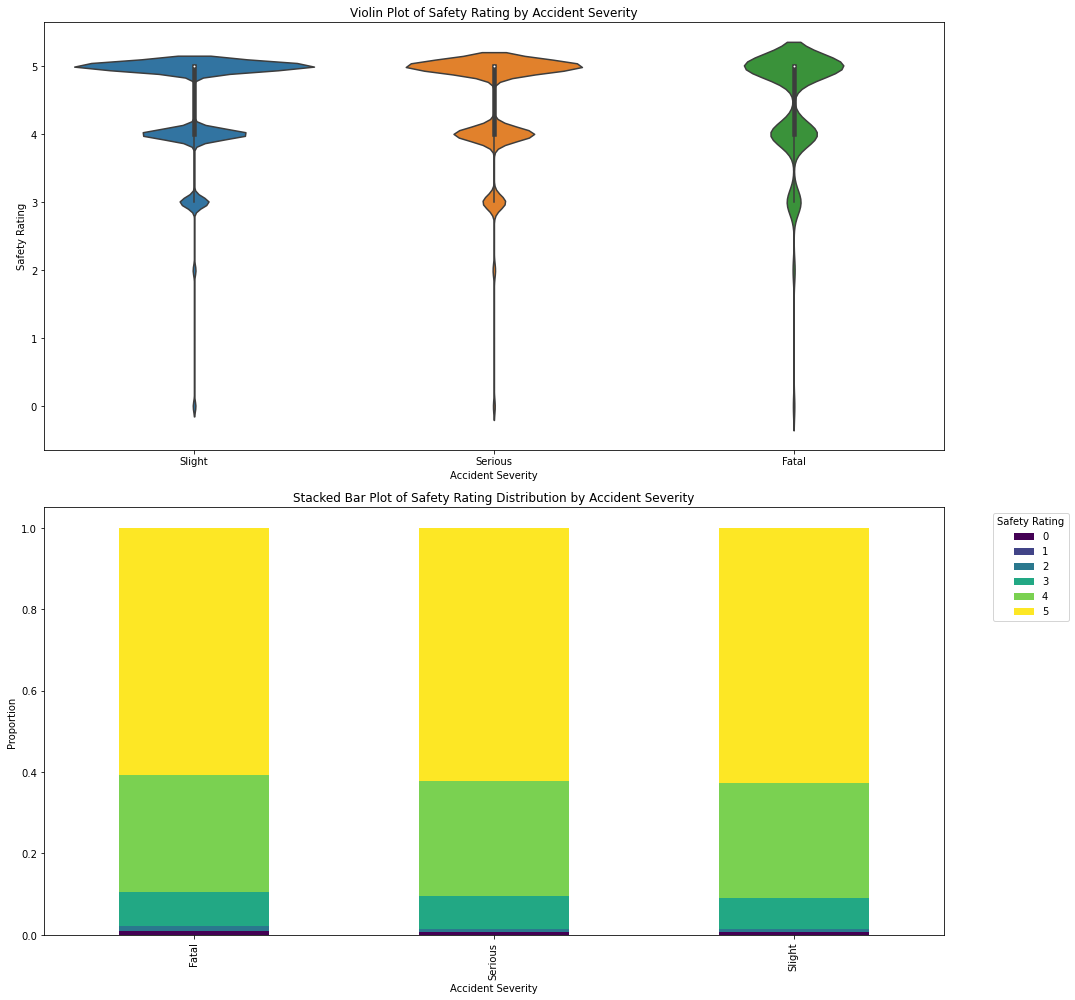

In [6]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 14))

# Violin plot
sns.violinplot(x='accident_severity', y='Safety Rating', data=data, ax=axes[0], order=["Slight", "Serious", "Fatal"])
axes[0].set_title('Violin Plot of Safety Rating by Accident Severity')
axes[0].set_xlabel('Accident Severity')
axes[0].set_ylabel('Safety Rating')

# Stacked bar plot
severity_counts = data.groupby(['accident_severity', 'Safety Rating']).size().unstack()
severity_counts_normalized = severity_counts.divide(severity_counts.sum(axis=1), axis=0)
severity_counts_normalized.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Stacked Bar Plot of Safety Rating Distribution by Accident Severity')
axes[1].set_xlabel('Accident Severity')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Safety Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
# Preparing data for boxplot using Matplotlib
slight_data = data[data['accident_severity'] == 'Slight']['age_of_vehicle_numeric'].dropna()
serious_data = data[data['accident_severity'] == 'Serious']['age_of_vehicle_numeric'].dropna()
fatal_data = data[data['accident_severity'] == 'Fatal']['age_of_vehicle_numeric'].dropna()

# Plotting the box plot using Matplotlib
plt.figure(figsize=(15, 8))
plt.boxplot([slight_data, serious_data, fatal_data], labels=["Slight", "Serious", "Fatal"], vert=True)
plt.title('Box Plot of Vehicle Age by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Age (in years)')
plt.show()


KeyError: 'age_of_vehicle_numeric'

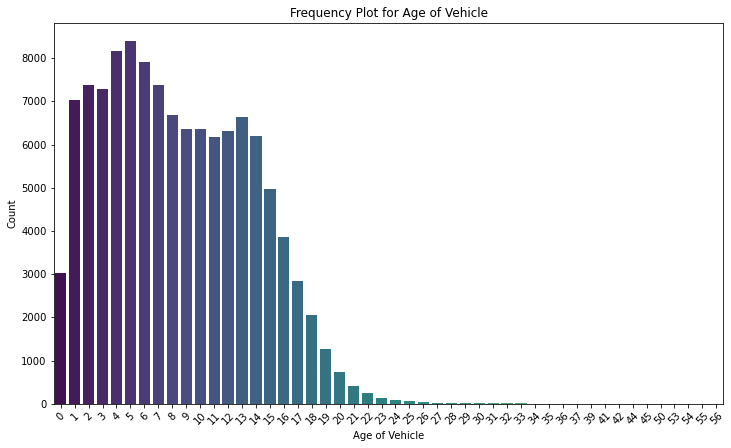

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


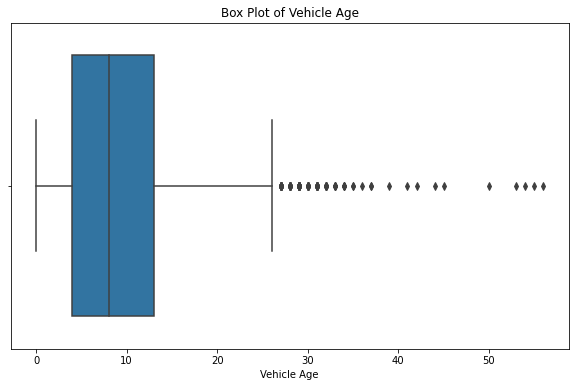

In [28]:
# Frequency plot for 'age_of_vehicle'
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x='age_of_vehicle', palette='viridis')
plt.title('Frequency Plot for Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (assuming it's named 'data')
# data = pd.read_csv('path_to_your_data.csv')

# Create a box plot for vehicle age
plt.figure(figsize=(10, 6))
sns.boxplot(data['age_of_vehicle'])
plt.title('Box Plot of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.show()


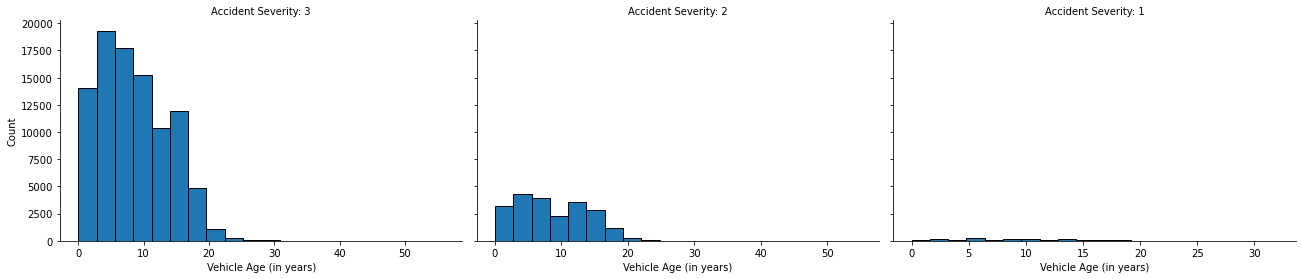

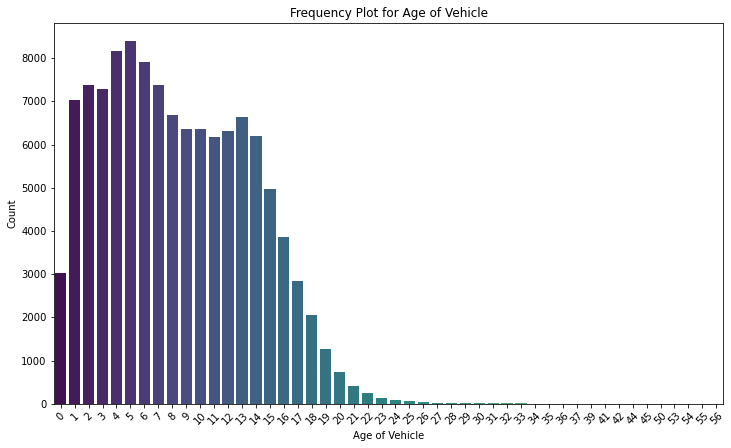

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


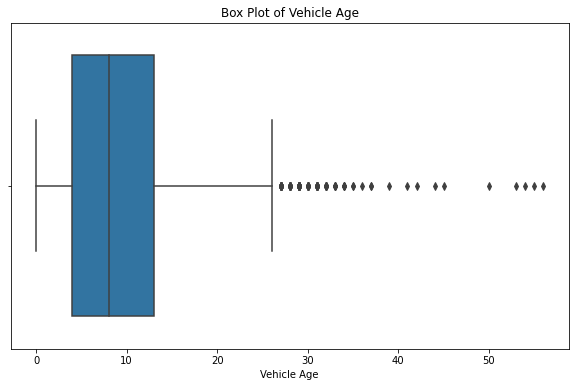

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the FacetGrid with the dataset and the variable to facet by (i.e., accident_severity)
g = sns.FacetGrid(data, col="accident_severity", col_order=[3,2,1], height=4, aspect=1.5, sharex=False)

# Map a histogram to the FacetGrid for the age_of_vehicle column
g.map(plt.hist, 'age_of_vehicle', bins=20, edgecolor="k")

# Set titles and labels
g.set_titles("Accident Severity: {col_name}")
g.set_axis_labels("Vehicle Age (in years)", "Count")
g.set(ylim=(0, None))

# Display the plots
plt.show()

# Frequency plot for 'age_of_vehicle'
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x='age_of_vehicle', palette='viridis')
plt.title('Frequency Plot for Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# Load your data (assuming it's named 'data')
# data = pd.read_csv('path_to_your_data.csv')

# Create a box plot for vehicle age
plt.figure(figsize=(10, 6))
sns.boxplot(data['age_of_vehicle'])
plt.title('Box Plot of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.show()

In [45]:
# Group by 'accident_severity' and get descriptive statistics for 'age_of_vehicle_numeric'
desc_stats_by_severity = data.groupby('accident_severity')['age_of_vehicle'].describe()
print(desc_stats_by_severity)


                     count      mean       std  min  25%  50%   75%   max
accident_severity                                                        
1                   1616.0  9.007426  5.397277  0.0  5.0  9.0  13.0  32.0
2                  21535.0  8.528024  5.322142  0.0  4.0  8.0  13.0  55.0
3                  95040.0  8.379040  5.212507  0.0  4.0  8.0  12.0  56.0


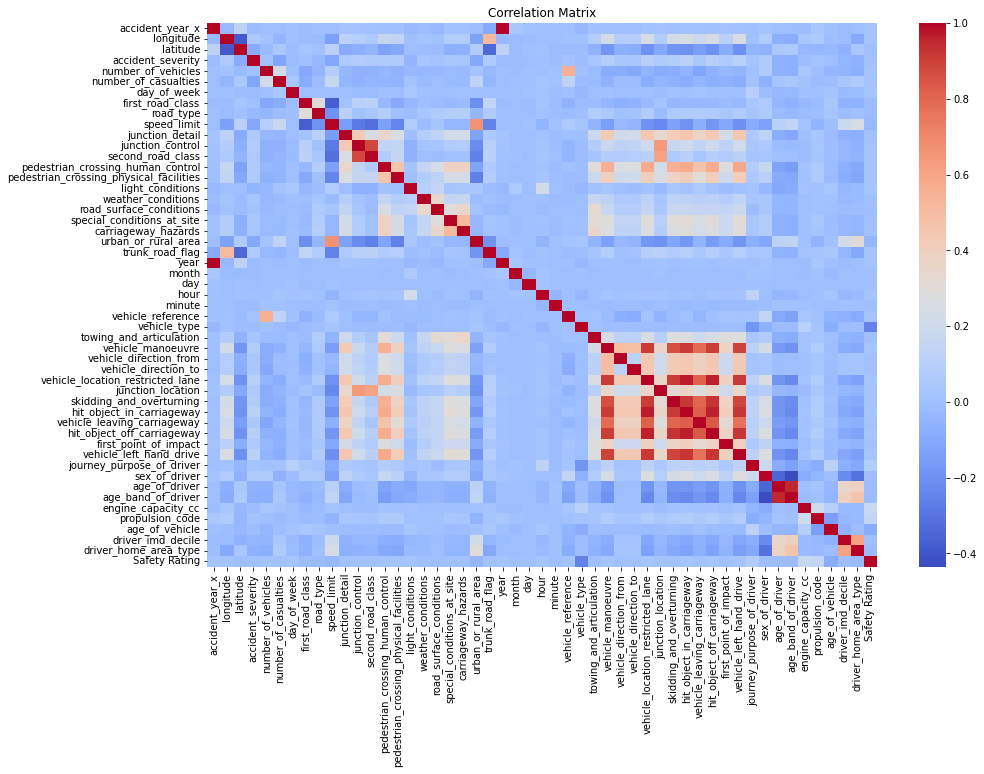

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [51]:
print(corr_matrix)

                                         accident_year_x  longitude  latitude  \
accident_year_x                                 1.000000   0.040980  0.078949   
longitude                                       0.040980   1.000000 -0.222069   
latitude                                        0.078949  -0.222069  1.000000   
accident_severity                              -0.009007   0.012089 -0.035951   
number_of_vehicles                             -0.000801   0.017989 -0.026736   
number_of_casualties                           -0.005386  -0.021046  0.034788   
day_of_week                                     0.004839   0.003412 -0.001873   
first_road_class                               -0.013233  -0.026019  0.043511   
road_type                                      -0.003351  -0.039698  0.020893   
speed_limit                                    -0.007355  -0.062060  0.042371   
junction_detail                                 0.024048   0.030495 -0.020811   
second_road_class           

In [57]:
corr_matrix.to_csv('D:/Dissertation/Dataset/Analysis/comatrix.csv',index=False)

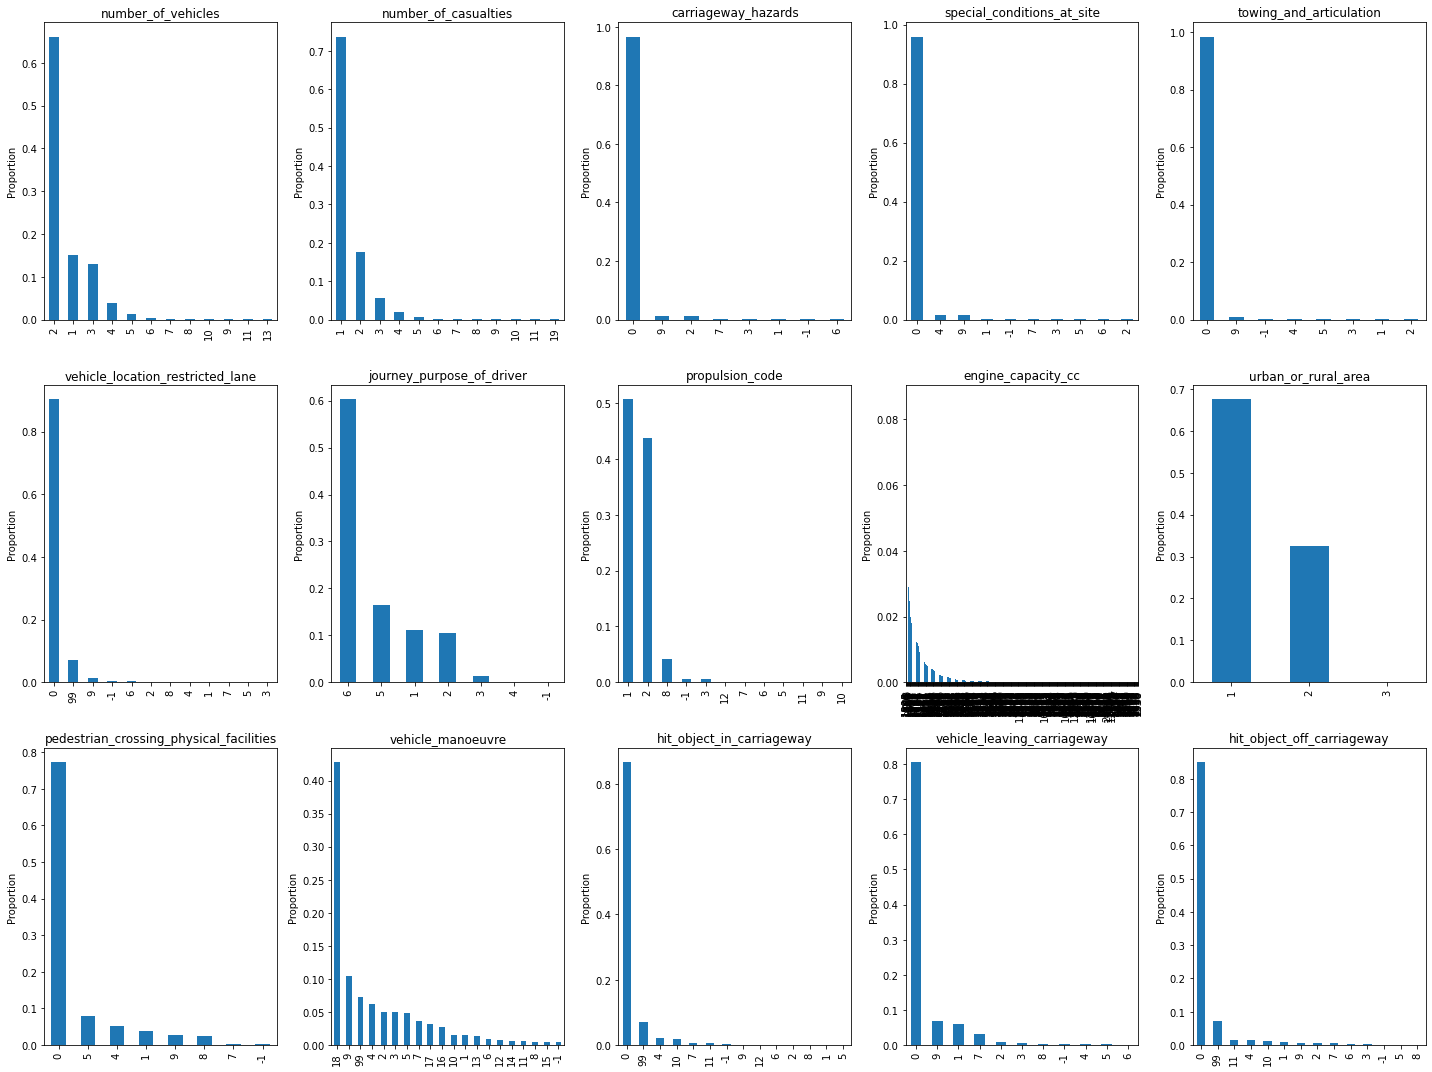

In [63]:
# List of specified variables for plotting
variables_to_plot = [
    "number_of_vehicles", "number_of_casualties", "carriageway_hazards",
    "special_conditions_at_site", "towing_and_articulation", "vehicle_location_restricted_lane",
    "journey_purpose_of_driver", "propulsion_code", "engine_capacity_cc",
    "urban_or_rural_area", "pedestrian_crossing_physical_facilities", "vehicle_manoeuvre",
    "hit_object_in_carriageway", "vehicle_leaving_carriageway", "hit_object_off_carriageway"
]

# Plotting the pre-binning distribution for each variable
plt.figure(figsize=(20,15))

for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3,5, i)
    data[var].value_counts(normalize=True).plot(kind='bar')
    plt.title(var)
    plt.ylabel('Proportion')
    plt.tight_layout()

plt.show()


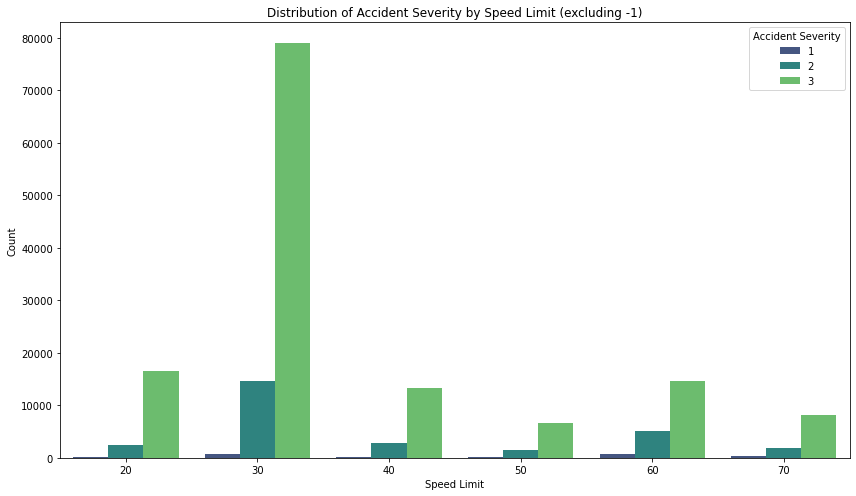

In [66]:
# Filtering out the data with speed_limit as -1
filtered_data = data[data['speed_limit'] != -1]

# Plotting the relationship between speed_limit and accident_severity using bar plots for the filtered data
plt.figure(figsize=(12, 7))
sns.countplot(x='speed_limit', hue='accident_severity', data=filtered_data, palette='viridis')
plt.title("Distribution of Accident Severity by Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()


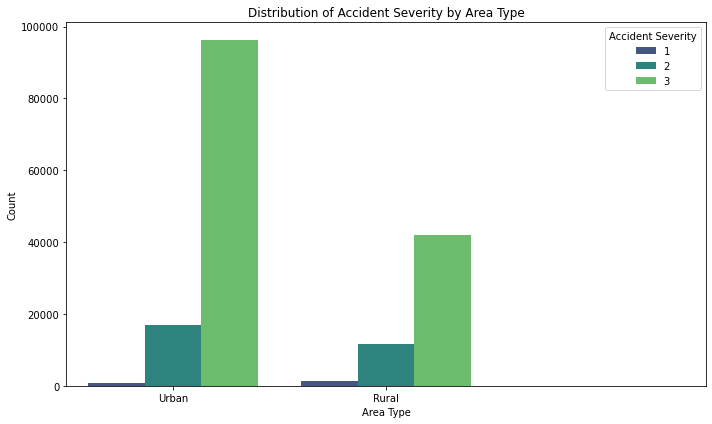

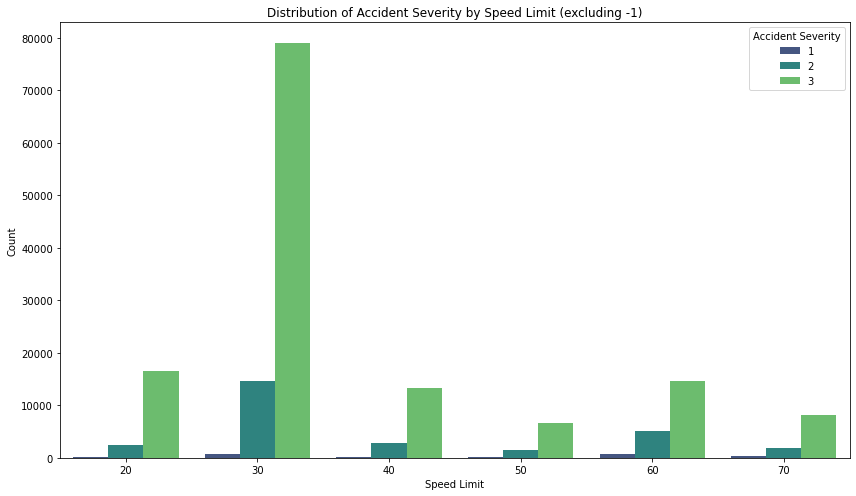

In [72]:

# Plotting the relationship between urban_or_rural_area and accident_severity using bar plots
plt.figure(figsize=(10, 6))
sns.countplot(x='urban_or_rural_area', hue='accident_severity', data=filtered_data, palette='viridis')
plt.title("Distribution of Accident Severity by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Count")
plt.legend(title="Accident Severity")
plt.xticks(ticks=[0, 1], labels=["Urban", "Rural"])
plt.tight_layout()
plt.show()
# Filtering out the data with speed_limit as -1
filtered_data = data[data['speed_limit'] != -1]

# Plotting the relationship between speed_limit and accident_severity using bar plots for the filtered data
plt.figure(figsize=(12, 7))
sns.countplot(x='speed_limit', hue='accident_severity', data=filtered_data, palette='viridis')
plt.title("Distribution of Accident Severity by Speed Limit (excluding -1)")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()

# Filtering out the data with urban_or_rural_area as 3 (Unallocated)
filtered_data_area = filtered_data[filtered_data['urban_or_rural_area'] != 3]





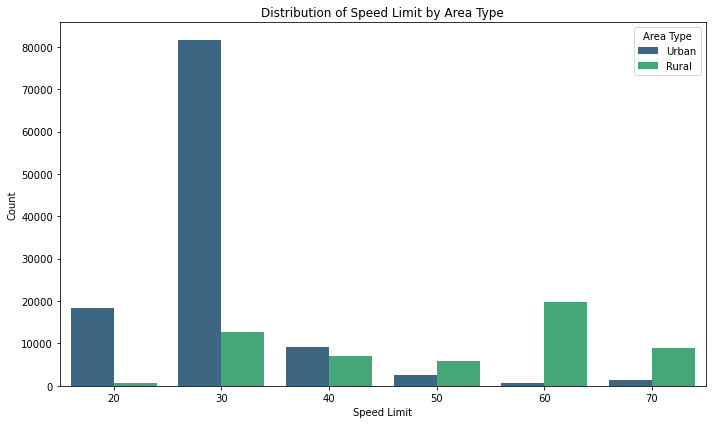

In [69]:
# Plotting the relationship between urban_or_rural_area and speed_limit using bar plots
plt.figure(figsize=(10, 6))
sns.countplot(x='speed_limit', hue='urban_or_rural_area', data=filtered_data_area, palette='viridis')
plt.title("Distribution of Speed Limit by Area Type")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.legend(title="Area Type", labels=["Urban", "Rural"])
plt.tight_layout()
plt.show()

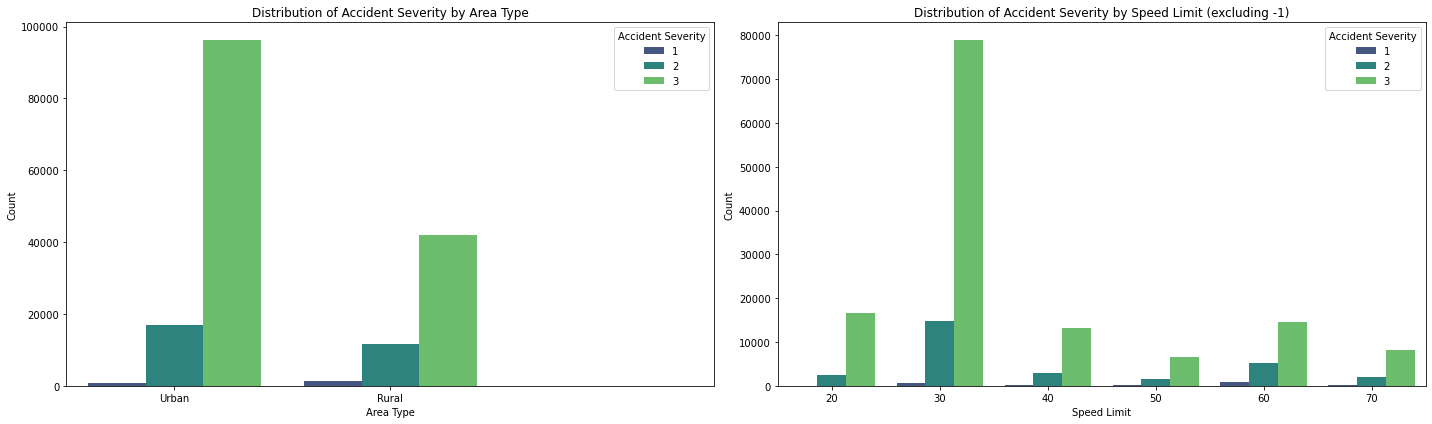

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot for urban_or_rural_area vs accident_severity
sns.countplot(x='urban_or_rural_area', hue='accident_severity', data=filtered_data, palette='viridis', ax=axes[0])
axes[0].set_title("Distribution of Accident Severity by Area Type")
axes[0].set_xlabel("Area Type")
axes[0].set_ylabel("Count")
axes[0].legend(title="Accident Severity")
axes[0].set_xticks(ticks=[0, 1])
axes[0].set_xticklabels(["Urban", "Rural"])

# Filtering data
filtered_data = data[data['speed_limit'] != -1]

# Plot for speed_limit vs accident_severity
sns.countplot(x='speed_limit', hue='accident_severity', data=filtered_data, palette='viridis', ax=axes[1])
axes[1].set_title("Distribution of Accident Severity by Speed Limit (excluding -1)")
axes[1].set_xlabel("Speed Limit")
axes[1].set_ylabel("Count")
axes[1].legend(title="Accident Severity")

plt.tight_layout()
plt.show()

# Filter data
filtered_data_area = filtered_data[filtered_data['urban_or_rural_area'] != 3]


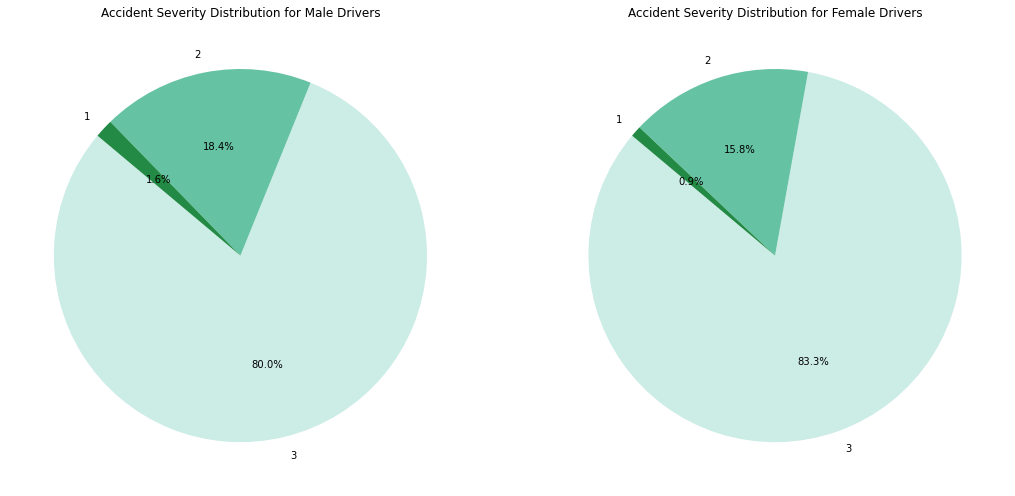

In [81]:
filtered_gender_data = data[data['sex_of_driver'] != 3]
# Preparing data for pie chart
male_data = filtered_gender_data[filtered_gender_data['sex_of_driver'] == 1]['accident_severity'].value_counts()
female_data = filtered_gender_data[filtered_gender_data['sex_of_driver'] == 2]['accident_severity'].value_counts()

# Plotting Pie chart for male drivers
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].pie(male_data, labels=male_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("BuGn", n_colors=3))
ax[0].set_title("Accident Severity Distribution for Male Drivers")

# Plotting Pie chart for female drivers
ax[1].pie(female_data, labels=female_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("BuGn", n_colors=3))
ax[1].set_title("Accident Severity Distribution for Female Drivers")

plt.tight_layout()
plt.show()


C:\Users\anura\AppData\Local\Temp\ipykernel_31984\2280467427.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather_light_data['light_conditions'] = filtered_weather_light_data['light_conditions'].map(light_conditions_mapping)
C:\Users\anura\AppData\Local\Temp\ipykernel_31984\2280467427.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather_light_data['weather_conditions'] = filtered_weather_light_data['weather_conditions'].map(weather_conditions_mapping)
C:\Users\anura\AppData

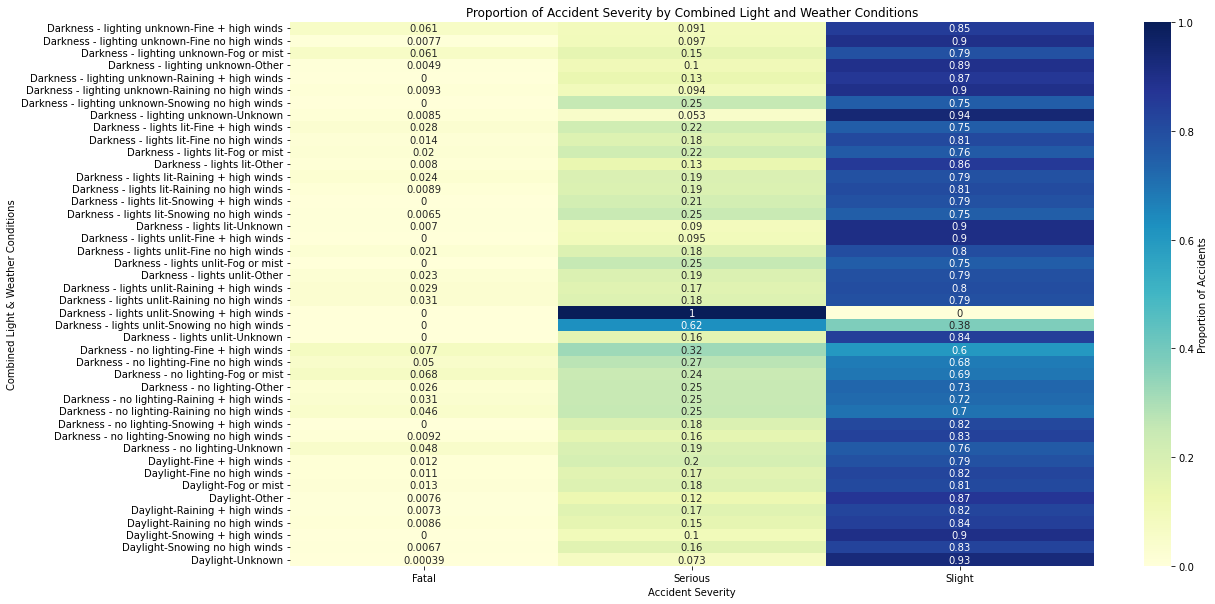

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filtering out data with undefined or missing values in relevant columns
filtered_weather_light_data = data[
    (data['light_conditions'].isin([1, 4, 5, 6, 7])) & 
    (data['weather_conditions'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9]))
]

# Mapping naming conventions
light_conditions_mapping = {
    1: 'Daylight',
    4: 'Darkness - lights lit',
    5: 'Darkness - lights unlit',
    6: 'Darkness - no lighting',
    7: 'Darkness - lighting unknown',
    -1: 'Data missing or out of range'
}
weather_conditions_mapping = {
    1: 'Fine no high winds',
    2: 'Raining no high winds',
    3: 'Snowing no high winds',
    4: 'Fine + high winds',
    5: 'Raining + high winds',
    6: 'Snowing + high winds',
    7: 'Fog or mist',
    8: 'Other',
    9: 'Unknown'
}
accident_severity_mapping = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

# Applying mappings
filtered_weather_light_data['light_conditions'] = filtered_weather_light_data['light_conditions'].map(light_conditions_mapping)
filtered_weather_light_data['weather_conditions'] = filtered_weather_light_data['weather_conditions'].map(weather_conditions_mapping)
filtered_weather_light_data['accident_severity'] = filtered_weather_light_data['accident_severity'].map(accident_severity_mapping)

# Creating a pivot table for the heatmap
heatmap_data = filtered_weather_light_data.groupby(['light_conditions', 'weather_conditions', 'accident_severity']).size().unstack().fillna(0)

# Normalizing data for proportions
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Plotting heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data_normalized, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Proportion of Accidents'})
plt.title("Proportion of Accident Severity by Combined Light and Weather Conditions")
plt.xlabel("Accident Severity")
plt.ylabel("Combined Light & Weather Conditions")
plt.show()
